In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..") 

from src.utils import *

# Early fusion

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
audio_embs = torch.load('../embeddings/audio/raw.pt')
video_embs = torch.load('../embeddings/video/raw2.pt')

def concat_embs(embs_dict1, embs_dict2):
    get_embeddings = lambda embs_dict: torch.stack(list(embs_dict.keys()), dim = 0)
    embs1 = get_embeddings(embs_dict1)
    embs2 = get_embeddings(embs_dict2)
    labels = list(embs_dict1.values())
    fused_embs = torch.cat((embs1, embs2), dim = 1)
    fused_embs = list(torch.chunk(fused_embs, chunks = len(labels), dim = 0))
    fused_embs = [emb.squeeze(0) for emb in fused_embs]
    result_dict = dict(zip(fused_embs, labels))
    return result_dict

In [3]:
fused_embs = concat_embs(audio_embs, video_embs)

In [4]:
train_loader, test_loader = train_test_dataloader(fused_embs)

In [5]:
model = MLP(input_dim = 1280, hidden_dims = [512, 256], output_dim = 6).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
num_epochs = 50

PARAMS = {'model': model,
          'criterion': criterion,
          'optimizer': optimizer,
          'num_epochs': num_epochs,
          'train_loader': train_loader,
          'test_loader': test_loader,
          'device': DEVICE}

/home/mweuro/venvy/best_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
results = train_model(**PARAMS)

Epoch 1/50
Train Loss: 1.4587, Train Accuracy: 0.3975
Val Loss: 1.2356, Val Accuracy: 0.4916
--------------------------------------------------


Epoch 2/50
Train Loss: 1.2060, Train Accuracy: 0.5386
Val Loss: 1.0659, Val Accuracy: 0.5870
--------------------------------------------------


Epoch 3/50
Train Loss: 1.1064, Train Accuracy: 0.5801
Val Loss: 1.0230, Val Accuracy: 0.6306
--------------------------------------------------


Epoch 4/50
Train Loss: 1.0306, Train Accuracy: 0.6045
Val Loss: 0.8871, Val Accuracy: 0.6622
--------------------------------------------------


Epoch 5/50
Train Loss: 0.9825, Train Accuracy: 0.6274
Val Loss: 0.8175, Val Accuracy: 0.6897
--------------------------------------------------


Epoch 6/50
Train Loss: 0.9643, Train Accuracy: 0.6361
Val Loss: 0.8256, Val Accuracy: 0.7058
--------------------------------------------------


Epoch 7/50
Train Loss: 0.9350, Train Accuracy: 0.6505
Val Loss: 0.7773, Val Accuracy: 0.7179
--------------------------------------------------


Epoch 8/50
Train Loss: 0.8911, Train Accuracy: 0.6663
Val Loss: 0.8274, Val Accuracy: 0.6897
--------------------------------------------------


Epoch 9/50
Train Loss: 0.8711, Train Accuracy: 0.6725
Val Loss: 1.0151, Val Accuracy: 0.5850
--------------------------------------------------


Epoch 10/50
Train Loss: 0.8549, Train Accuracy: 0.6725
Val Loss: 0.7840, Val Accuracy: 0.7092
--------------------------------------------------


Epoch 11/50
Train Loss: 0.8407, Train Accuracy: 0.6863
Val Loss: 0.8028, Val Accuracy: 0.7139
--------------------------------------------------


Epoch 12/50
Train Loss: 0.8266, Train Accuracy: 0.6930
Val Loss: 0.8070, Val Accuracy: 0.6897
--------------------------------------------------


Epoch 13/50
Train Loss: 0.7978, Train Accuracy: 0.7061
Val Loss: 0.7288, Val Accuracy: 0.7381
--------------------------------------------------


Epoch 14/50
Train Loss: 0.7852, Train Accuracy: 0.7073
Val Loss: 0.7404, Val Accuracy: 0.7340
--------------------------------------------------


Epoch 15/50
Train Loss: 0.7876, Train Accuracy: 0.7078
Val Loss: 0.7496, Val Accuracy: 0.7280
--------------------------------------------------


Epoch 16/50
Train Loss: 0.7849, Train Accuracy: 0.7110
Val Loss: 0.7587, Val Accuracy: 0.7152
--------------------------------------------------


Epoch 17/50
Train Loss: 0.7508, Train Accuracy: 0.7273
Val Loss: 0.6648, Val Accuracy: 0.7495
--------------------------------------------------


Epoch 18/50
Train Loss: 0.7956, Train Accuracy: 0.7043
Val Loss: 0.6872, Val Accuracy: 0.7529
--------------------------------------------------


Epoch 19/50
Train Loss: 0.7670, Train Accuracy: 0.7166
Val Loss: 0.7802, Val Accuracy: 0.7079
--------------------------------------------------


Epoch 20/50
Train Loss: 0.7266, Train Accuracy: 0.7272
Val Loss: 0.6329, Val Accuracy: 0.7690
--------------------------------------------------


Epoch 21/50
Train Loss: 0.7138, Train Accuracy: 0.7404
Val Loss: 0.7285, Val Accuracy: 0.7327
--------------------------------------------------


Epoch 22/50
Train Loss: 0.7299, Train Accuracy: 0.7305
Val Loss: 0.6045, Val Accuracy: 0.7790
--------------------------------------------------


Epoch 23/50
Train Loss: 0.6948, Train Accuracy: 0.7366
Val Loss: 0.6426, Val Accuracy: 0.7623
--------------------------------------------------


Epoch 24/50
Train Loss: 0.6930, Train Accuracy: 0.7461
Val Loss: 0.6801, Val Accuracy: 0.7428
--------------------------------------------------


Epoch 25/50
Train Loss: 0.6783, Train Accuracy: 0.7473
Val Loss: 0.6860, Val Accuracy: 0.7515
--------------------------------------------------


Epoch 26/50
Train Loss: 0.6769, Train Accuracy: 0.7482
Val Loss: 0.6738, Val Accuracy: 0.7576
--------------------------------------------------


Epoch 27/50
Train Loss: 0.6410, Train Accuracy: 0.7656
Val Loss: 0.5923, Val Accuracy: 0.7898
--------------------------------------------------


Epoch 28/50
Train Loss: 0.6584, Train Accuracy: 0.7566
Val Loss: 0.7229, Val Accuracy: 0.7374
--------------------------------------------------


Epoch 29/50
Train Loss: 0.6486, Train Accuracy: 0.7641
Val Loss: 0.6818, Val Accuracy: 0.7522
--------------------------------------------------


Epoch 30/50
Train Loss: 0.6759, Train Accuracy: 0.7518
Val Loss: 0.7018, Val Accuracy: 0.7394
--------------------------------------------------


Epoch 31/50
Train Loss: 0.6448, Train Accuracy: 0.7618
Val Loss: 0.6772, Val Accuracy: 0.7636
--------------------------------------------------


Epoch 32/50
Train Loss: 0.6272, Train Accuracy: 0.7644
Val Loss: 0.6147, Val Accuracy: 0.7824
--------------------------------------------------


Epoch 33/50
Train Loss: 0.6390, Train Accuracy: 0.7594
Val Loss: 0.6618, Val Accuracy: 0.7636
--------------------------------------------------


Epoch 34/50
Train Loss: 0.6580, Train Accuracy: 0.7539
Val Loss: 0.6281, Val Accuracy: 0.7817
--------------------------------------------------


Epoch 35/50
Train Loss: 0.6339, Train Accuracy: 0.7623
Val Loss: 0.5618, Val Accuracy: 0.8032
--------------------------------------------------


Epoch 36/50
Train Loss: 0.6097, Train Accuracy: 0.7755
Val Loss: 0.6433, Val Accuracy: 0.7562
--------------------------------------------------


Epoch 37/50
Train Loss: 0.6314, Train Accuracy: 0.7638
Val Loss: 0.5832, Val Accuracy: 0.7965
--------------------------------------------------


Epoch 38/50
Train Loss: 0.6095, Train Accuracy: 0.7737
Val Loss: 0.6129, Val Accuracy: 0.7764
--------------------------------------------------


Epoch 39/50
Train Loss: 0.5929, Train Accuracy: 0.7814
Val Loss: 0.6208, Val Accuracy: 0.7831
--------------------------------------------------


Epoch 40/50
Train Loss: 0.6073, Train Accuracy: 0.7727
Val Loss: 0.5726, Val Accuracy: 0.7925
--------------------------------------------------


Epoch 41/50
Train Loss: 0.5767, Train Accuracy: 0.7891
Val Loss: 0.5788, Val Accuracy: 0.7952
--------------------------------------------------


Epoch 42/50
Train Loss: 0.6148, Train Accuracy: 0.7752
Val Loss: 0.6196, Val Accuracy: 0.7898
--------------------------------------------------


Epoch 43/50
Train Loss: 0.5896, Train Accuracy: 0.7786
Val Loss: 0.6187, Val Accuracy: 0.7824
--------------------------------------------------


Epoch 44/50
Train Loss: 0.6263, Train Accuracy: 0.7708
Val Loss: 0.5837, Val Accuracy: 0.7945
--------------------------------------------------


Epoch 45/50
Train Loss: 0.6387, Train Accuracy: 0.7646
Val Loss: 0.6610, Val Accuracy: 0.7623
--------------------------------------------------


Epoch 46/50
Train Loss: 0.6048, Train Accuracy: 0.7744
Val Loss: 0.5888, Val Accuracy: 0.7864
--------------------------------------------------


Epoch 47/50
Train Loss: 0.6313, Train Accuracy: 0.7707
Val Loss: 0.6012, Val Accuracy: 0.8059
--------------------------------------------------


Epoch 48/50
Train Loss: 0.6048, Train Accuracy: 0.7781
Val Loss: 0.6842, Val Accuracy: 0.7576
--------------------------------------------------


Epoch 49/50
Train Loss: 0.5849, Train Accuracy: 0.7848
Val Loss: 0.6978, Val Accuracy: 0.7495
--------------------------------------------------


Epoch 50/50
Train Loss: 0.6645, Train Accuracy: 0.7555
Val Loss: 0.5908, Val Accuracy: 0.7891
--------------------------------------------------


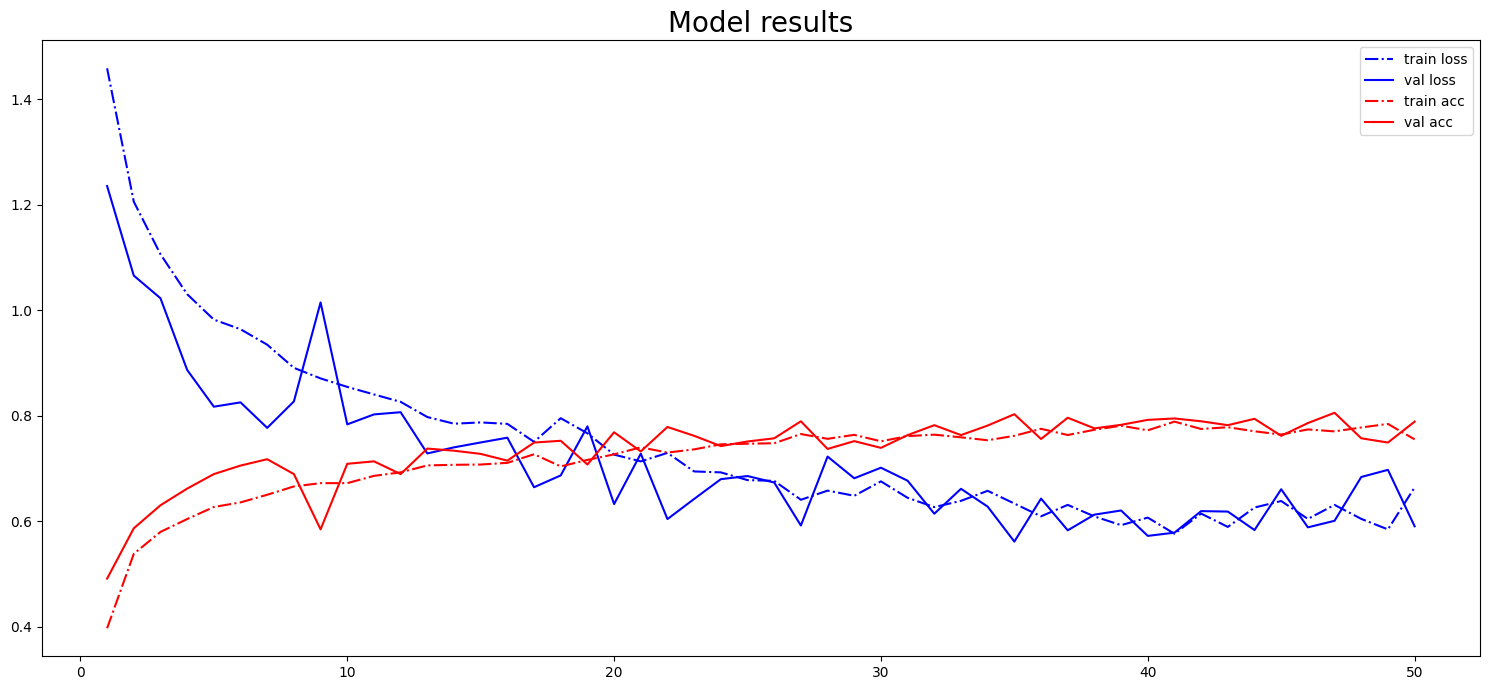

In [7]:
plot_metrics(*results)